# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 90 # days

In [4]:
seed = 3137

In [5]:
np.random.seed(seed)
scenario = {}

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
logger().model = model
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

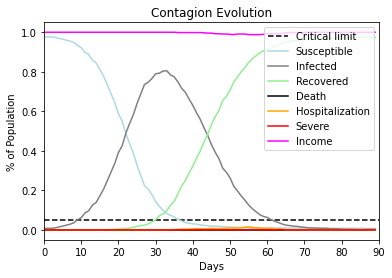

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

Save these seeds if you want to rerun a scenario
[5684, 6826, 7006, 5257, 8895, 3683, 2151, 7548, 9902, 6361, 9658, 1779, 3078, 5861, 8693, 0, 9272, 884, 2217, 3258, 4331, 9006, 4091, 8555, 8640, 9081, 563, 9611, 6922, 2783, 8247, 8020, 6473, 2682, 6936, 6769, 4574, 9315, 144, 644, 132, 8709, 8139, 2715, 3234, 7312, 5325, 1261, 7650, 4671]
run with seed 5684:
run with seed 6826:
run with seed 7006:
run with seed 5257:
run with seed 8895:
run with seed 3683:
run with seed 2151:
run with seed 7548:
run with seed 9902:
run with seed 6361:
run with seed 9658:
run with seed 1779:
run with seed 3078:
run with seed 5861:
run with seed 8693:
run with seed 0:
run with seed 9272:
run with seed 884:
run with seed 2217:
run with seed 3258:
run with seed 4331:
run with seed 9006:
run with seed 4091:
run with seed 8555:
run with seed 8640:
run with seed 9081:
run with seed 563:
run with seed 9611:
run with seed 6922:
run with seed 2783:
run with seed 8247:
run with seed 8020:
run with seed 6473:
run

(<function dict.items>, <function dict.items>, <function dict.items>)

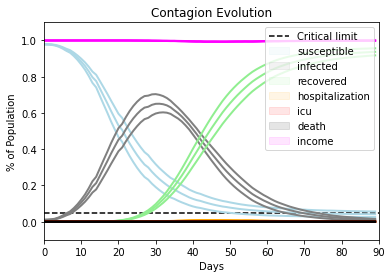

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene1", do_print = True)

## Scenario 2

Complete lockdown

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)

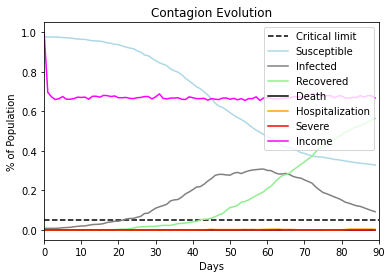

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[4221, 6175, 8064, 4273, 436, 7401, 9614, 6018, 9897, 9072, 5641, 5951, 6910, 1886, 1033, 6647, 2796, 8766, 6219, 5351, 8389, 429, 1312, 7657, 9035, 2207, 6606, 4993, 2508, 7803, 1275, 8681, 9615, 2140, 3080, 5766, 9100, 1619, 2049, 5211, 4408, 7652, 818, 7248, 6682, 9042, 6320, 9037, 3254, 1605]
run with seed 4221:
run with seed 6175:
run with seed 8064:
run with seed 4273:
run with seed 436:
run with seed 7401:
run with seed 9614:
run with seed 6018:
run with seed 9897:
run with seed 9072:
run with seed 5641:
run with seed 5951:
run with seed 6910:
run with seed 1886:
run with seed 1033:
run with seed 6647:
run with seed 2796:
run with seed 8766:
run with seed 6219:
run with seed 5351:
run with seed 8389:
run with seed 429:
run with seed 1312:
run with seed 7657:
run with seed 9035:
run with seed 2207:
run with seed 6606:
run with seed 4993:
run with seed 2508:
run with seed 7803:
run with seed 1275:
run with seed 8681:
run with seed 9

(<function dict.items>, <function dict.items>, <function dict.items>)

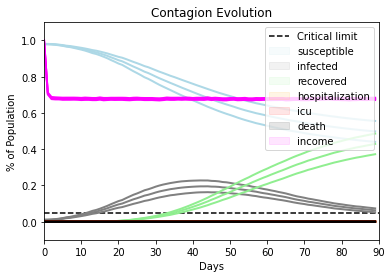

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene2", do_print = True)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [13]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

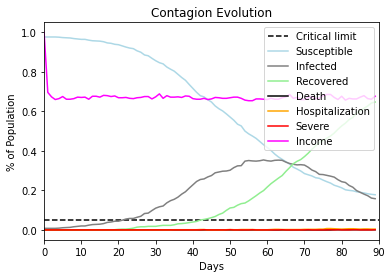

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[2023, 8852, 4329, 8078, 0, 2789, 4320, 2428, 4228, 3857, 2845, 8445, 4053, 9443, 3993, 7885, 4544, 6634, 4818, 6448, 6829, 5775, 6923, 4250, 594, 4488, 1756, 322, 9302, 4950, 9582, 5735, 4845, 570, 38, 1017, 4936, 9349, 6753, 8023, 1080, 4604, 1117, 5835, 2438, 6662, 4063, 1099, 4011, 6857]
run with seed 2023:
run with seed 8852:
run with seed 4329:
run with seed 8078:
run with seed 0:
run with seed 2789:
run with seed 4320:
run with seed 2428:
run with seed 4228:
run with seed 3857:
run with seed 2845:
run with seed 8445:
run with seed 4053:
run with seed 9443:
run with seed 3993:
run with seed 7885:
run with seed 4544:
run with seed 6634:
run with seed 4818:
run with seed 6448:
run with seed 6829:
run with seed 5775:
run with seed 6923:
run with seed 4250:
run with seed 594:
run with seed 4488:
run with seed 1756:
run with seed 322:
run with seed 9302:
run with seed 4950:
run with seed 9582:
run with seed 5735:
run with seed 4845:
run

(<function dict.items>, <function dict.items>, <function dict.items>)

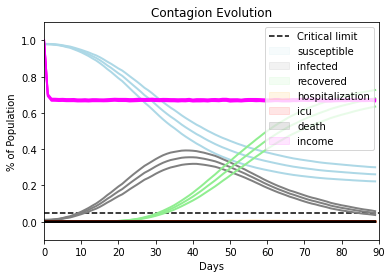

In [15]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene3", do_print = True)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [16]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

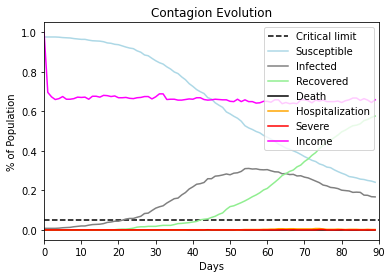

In [17]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[9067, 9070, 8619, 5039, 444, 6446, 5263, 1164, 3998, 6599, 8834, 403, 1348, 3021, 3645, 1660, 8736, 3872, 1479, 8689, 5459, 3855, 7111, 351, 9189, 1198, 521, 3725, 5182, 7497, 7602, 3707, 9960, 7135, 3183, 5760, 8603, 8436, 8945, 9402, 5935, 5443, 3360, 5219, 8213, 564, 8710, 409, 5199, 1695]
run with seed 9067:
run with seed 9070:
run with seed 8619:
run with seed 5039:
run with seed 444:
run with seed 6446:
run with seed 5263:
run with seed 1164:
run with seed 3998:
run with seed 6599:
run with seed 8834:
run with seed 403:
run with seed 1348:
run with seed 3021:
run with seed 3645:
run with seed 1660:
run with seed 8736:
run with seed 3872:
run with seed 1479:
run with seed 8689:
run with seed 5459:
run with seed 3855:
run with seed 7111:
run with seed 351:
run with seed 9189:
run with seed 1198:
run with seed 521:
run with seed 3725:
run with seed 5182:
run with seed 7497:
run with seed 7602:
run with seed 3707:
run with seed 9960:


(<function dict.items>, <function dict.items>, <function dict.items>)

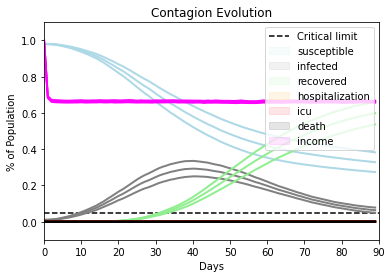

In [18]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene4", do_print = True)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [19]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

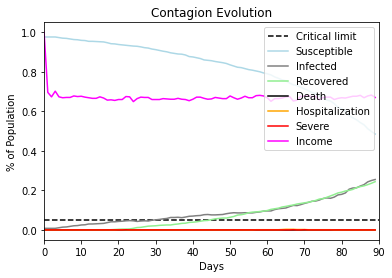

In [20]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[6026, 7917, 770, 9206, 3125, 1053, 937, 1173, 2432, 2314, 5333, 8570, 3135, 265, 9658, 6319, 1632, 9350, 1644, 1277, 2683, 7780, 1853, 827, 2732, 9967, 6159, 117, 91, 529, 6561, 1630, 5453, 8460, 1118, 6826, 9862, 9182, 632, 204, 2526, 6982, 3021, 6092, 6979, 7971, 8682, 6233, 3672, 5725]
run with seed 6026:
run with seed 7917:
run with seed 770:
run with seed 9206:
run with seed 3125:
run with seed 1053:
run with seed 937:
run with seed 1173:
run with seed 2432:
run with seed 2314:
run with seed 5333:
run with seed 8570:
run with seed 3135:
run with seed 265:
run with seed 9658:
run with seed 6319:
run with seed 1632:
run with seed 9350:
run with seed 1644:
run with seed 1277:
run with seed 2683:
run with seed 7780:
run with seed 1853:
run with seed 827:
run with seed 2732:
run with seed 9967:
run with seed 6159:
run with seed 117:
run with seed 91:
run with seed 529:
run with seed 6561:
run with seed 1630:
run with seed 5453:
run with

(<function dict.items>, <function dict.items>, <function dict.items>)

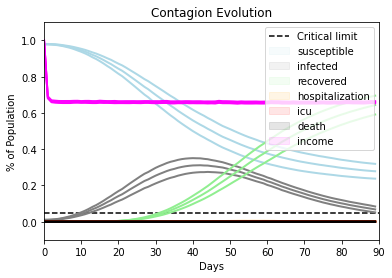

In [21]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene5", do_print = True)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [22]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

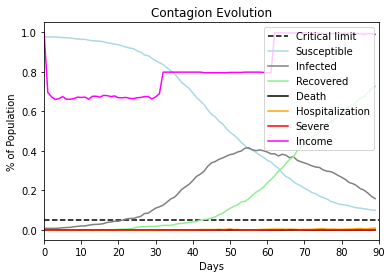

In [23]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[6375, 1358, 8443, 9915, 7294, 9747, 8780, 1408, 6700, 3355, 2662, 374, 7044, 8272, 3616, 3954, 6638, 4004, 8627, 8278, 4866, 3134, 4893, 5334, 2708, 6086, 5820, 6159, 4273, 9536, 7984, 5020, 8441, 9599, 5459, 1259, 2980, 8963, 1477, 1575, 8830, 3854, 8843, 2298, 6252, 3900, 3424, 8575, 628, 1591]
run with seed 6375:
run with seed 1358:
run with seed 8443:
run with seed 9915:
run with seed 7294:
run with seed 9747:
run with seed 8780:
run with seed 1408:
run with seed 6700:
run with seed 3355:
run with seed 2662:
run with seed 374:
run with seed 7044:
run with seed 8272:
run with seed 3616:
run with seed 3954:
run with seed 6638:
run with seed 4004:
run with seed 8627:
run with seed 8278:
run with seed 4866:
run with seed 3134:
run with seed 4893:
run with seed 5334:
run with seed 2708:
run with seed 6086:
run with seed 5820:
run with seed 6159:
run with seed 4273:
run with seed 9536:
run with seed 7984:
run with seed 5020:
run with seed

(<function dict.items>, <function dict.items>, <function dict.items>)

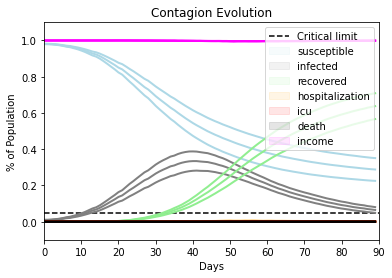

In [24]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene6", do_print = True)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [25]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

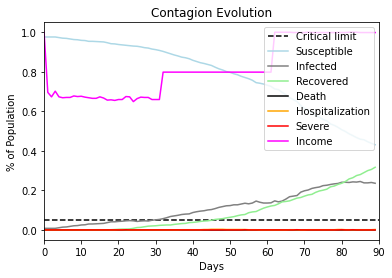

In [26]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[7043, 1738, 5144, 1506, 8078, 6614, 1065, 7072, 7241, 2574, 1109, 7971, 1678, 1459, 1732, 7338, 5181, 3291, 1404, 2311, 2004, 5544, 2088, 4383, 7269, 7252, 4392, 4805, 5026, 4765, 4644, 8154, 7070, 1962, 5581, 3022, 474, 9696, 5253, 4156, 1161, 9762, 9641, 5355, 9646, 79, 2425, 933, 7029, 7158]
run with seed 7043:
run with seed 1738:
run with seed 5144:
run with seed 1506:
run with seed 8078:
run with seed 6614:
run with seed 1065:
run with seed 7072:
run with seed 7241:
run with seed 2574:
run with seed 1109:
run with seed 7971:
run with seed 1678:
run with seed 1459:
run with seed 1732:
run with seed 7338:
run with seed 5181:
run with seed 3291:
run with seed 1404:
run with seed 2311:
run with seed 2004:
run with seed 5544:
run with seed 2088:
run with seed 4383:
run with seed 7269:
run with seed 7252:
run with seed 4392:
run with seed 4805:
run with seed 5026:
run with seed 4765:
run with seed 4644:
run with seed 8154:
run with seed 

(<function dict.items>, <function dict.items>, <function dict.items>)

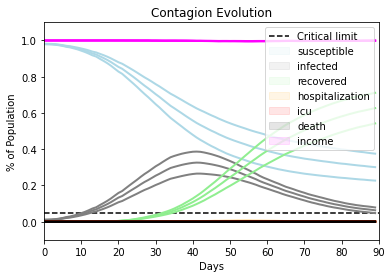

In [27]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "scene7", do_print = True)